# Session 5: Visualization and Machine Learning
MSA 8010: Data Programming

Sources:
- Data: Public crime data provided by the Atlanta Police Department.

    -https://www.atlantapd.org/i-want-to/crime-data-downloads (COBRA-2021)

In [1]:
#Creating a DataFrame of some Titanic passengers
import pandas as pd
df = pd.read_csv("data/COBRA-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16725 entries, 0 to 16724
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   offense_id     16725 non-null  int64  
 1   rpt_date       16725 non-null  object 
 2   occur_date     16716 non-null  object 
 3   occur_day      16716 non-null  object 
 4   occur_day_num  16716 non-null  float64
 5   occur_time     16716 non-null  object 
 6   poss_date      16387 non-null  object 
 7   poss_time      16387 non-null  object 
 8   beat           16725 non-null  int64  
 9   zone           16725 non-null  int64  
 10  location       16725 non-null  object 
 11  ibr_code       16725 non-null  object 
 12  UC2_Literal    16725 non-null  object 
 13  neighborhood   15956 non-null  object 
 14  npu            16519 non-null  object 
 15  lat            16725 non-null  float64
 16  long           16725 non-null  float64
dtypes: float64(3), int64(3), object(11)
memory usage: 

In [2]:
df.head()

,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,beat,zone,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,Wednesday,4.0,15:20,5/19/2021,15:25,103,1,"1720 MARIETTA BLVD NW\nATLANTA, GA 30318\nUNIT...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,Friday,6.0,22:23,8/6/2021,22:24,508,5,"300 PEACHTREE ST NE\nATLANTA, GA 30308\nUNITED...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21320347,2/1/2021,1/31/2021,Sunday,1.0,00:00,2/1/2021,06:53,509,5,"229 COURTLAND ST NE\nATLANTA, GA 30303\nUNITED...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.760759,-84.383773
3,21791668,6/28/2021,6/27/2021,Sunday,1.0,21:17,6/28/2021,20:00,102,1,"870 MAYSON TURNER RD NW\nATLANTA, GA 30314\nUN...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
4,61583880,2/11/2021,2/11/2021,Thursday,5.0,19:15,2/11/2021,20:29,401,4,"850 OAK ST SW\nATLANTA, GA 30310\nUNITED STATES",23F,LARCENY-FROM VEHICLE,West End,T,33.740594,-84.415800


In [3]:
def fixdatetime(fld):
    def _fix(s):
        date_col = '%s_date' % fld # "rpt_date"
        time_col = '%s_time' % fld # "rpt_time"
        if time_col in s.index:
            return str(s[date_col])+' '+str(s[time_col])
        else:
            return str(s[date_col])+' 00:00:00'
    return _fix

In [4]:
df['rpt_date'] = pd.to_datetime(df['rpt_date'])
df['occur_date'] = pd.to_datetime(df['occur_date'])
df['poss_date'] = pd.to_datetime(df['poss_date'])

In [5]:
df[["rpt_date","occur_date","poss_date"]].info()
#[ns] shows the precison is in nanoseconds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16725 entries, 0 to 16724
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rpt_date    16725 non-null  datetime64[ns]
 1   occur_date  16716 non-null  datetime64[ns]
 2   poss_date   16387 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 392.1 KB


In [13]:
print ("Min:",df.occur_date.min(), "Max:",df.occur_date.max())

df = df[df['occur_date'].dt.year >= 2021]
print('\nAftr removing all dates before 2021:')
print ("Min:",df.occur_date.min(), "Max:", df.occur_date.max())

Min: 2021-01-01 00:00:00 Max: 2021-09-16 00:00:00

Aftr removing all dates before 2021:
Min: 2021-01-01 00:00:00 Max: 2021-09-16 00:00:00


In [19]:
df[["occur_date", "UC2_Literal", "offense_id"]].head()

,occur_date,UC2_Literal,offense_id
0,2021-05-19,LARCENY-FROM VEHICLE,21140096
1,2021-08-06,LARCENY-FROM VEHICLE,21282015
2,2021-01-31,LARCENY-FROM VEHICLE,21320347
3,2021-06-27,LARCENY-NON VEHICLE,21791668
4,2021-02-11,LARCENY-FROM VEHICLE,61583880


In [27]:
# resample is like "groupby" for time
df.resample('M', closed='right', on='occur_date').offense_id.count()

occur_date
2021-01-31    2394
2021-02-28    1785
2021-03-31    1839
2021-04-30    1630
2021-05-31    1756
2021-06-30    1690
2021-07-31    2198
2021-08-31    2171
2021-09-30    1058
Freq: M, Name: offense_id, dtype: int64

In [39]:
df_ct = df.pivot_table(index="occur_date", columns="UC2_Literal", values="offense_id")
#pd.options.display.float_format = '{:.0f}'.format
df_ct.round(2).head()

UC2_Literal,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY
occur_date,,,,,,,
2021-01-01,210010958,210055694,210619569,nan,210017028,210042456,210011014
2021-01-02,210023917,210023783,210021008,nan,210024983,210032551,210021304
2021-01-03,210030406,210033337,210041041,nan,210033445,210034225,210031533
2021-01-04,210043172,210041214,210047325,210041272,210046309,209424576,210040321
2021-01-05,210051220,210058087,210051731,nan,210058201,210066245,nan


In [41]:
df_ct = df_ct.resample("1M", closed="right").count()
df_ct.head()

UC2_Literal,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY
occur_date,,,,,,,
2021-01-31,31,31,31,7,31,31,27
2021-02-28,27,28,28,8,28,28,27
2021-03-31,31,31,31,8,31,31,24
2021-04-30,30,30,30,9,30,30,29
2021-05-31,31,31,31,12,31,31,29


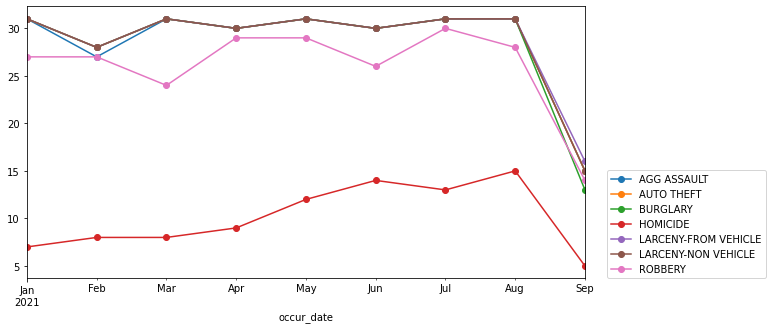

In [54]:
import matplotlib.pyplot as plt
df_ct.plot(figsize=(10,5), style='-o')
plt.legend(loc=(1.04,0))


#### Box Plot

<img src="boxplot.png" width="800" align="center" />



- **median (Q2/50th Percentile):** the middle value of the dataset.
- **first quartile (Q1/25th Percentile):** the middle number between the smallest number (not the “minimum”) and the median of the dataset.
- **third quartile (Q3/75th Percentile):** the middle value between the median and the highest value (not the “maximum”) of the dataset.
- **interquartile range (IQR):** 25th to the 75th percentile.

Text(0, 0.5, 'Total Crimes')

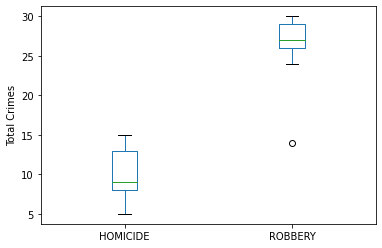

In [50]:
ax = df_ct[["HOMICIDE","ROBBERY"]].plot.box()
plt.ylabel("Total Crimes")

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Atlanta_Police_Zones_-_Feb_2013.jpg/588px-Atlanta_Police_Zones_-_Feb_2013.jpg" />

In [64]:
import numpy as np
df['Zone'] = df['beat']//100
df['Year'] = df["occur_date"].apply(lambda x: x.year)
df_cp = df.pivot_table(index="Zone", 
                       columns="UC2_Literal", 
                       values="offense_id", 
                       aggfunc=lambda x: np.count_nonzero(~np.isnan(x)))

In [65]:
df_cp

UC2_Literal,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY
Zone,,,,,,,
1,378,294,177,27,525,428,103
2,176,482,148,9,1432,805,79
3,420,347,217,21,446,431,102
4,384,324,192,22,573,523,102
5,263,629,133,11,2263,751,127
6,190,326,173,19,1562,616,97
7,5,27,3,nan,47,112,nan


### Machine Learning
